<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#0077be;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; background color:#0077be; font-weight: bold; font-family: Cursive">
Backpropagation</h1></center>

</div>

# Definition of Backpropagation:

Backpropagation is an essential algorithm in neural networks used for training and updating the weights of the network. It enables the network to learn from labeled examples by iteratively adjusting the weights based on the error between the predicted output and the true output. Through the process of forward propagation, the input data flows through the network, and the output is computed. Then, by comparing the predicted output to the actual output, the algorithm calculates the error. This error is then propagated backward through the network, assigning blame to each weight for the error. The weights are updated in the opposite direction of the gradient of the error with respect to the weights, using the derivative of the activation function. This iterative process continues until the network reaches a satisfactory level of accuracy. Backpropagation allows neural networks to adapt and learn complex patterns and relationships in the data, making it a fundamental technique for training deep learning models.

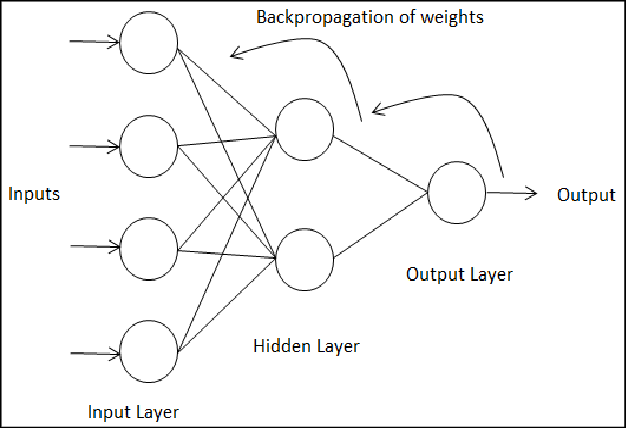

## Why sigmoid used as activation function in backpropagation?

The sigmoid activation function, specifically the logistic sigmoid function, is commonly used in backpropagation and neural networks for several reasons:

1. Non-linearity: The sigmoid function introduces non-linearity into the network, allowing it to learn and approximate complex non-linear relationships present in the data. Neural networks with only linear activation functions would be limited to representing linear transformations of the input.

2. Differentiability: The sigmoid function is differentiable, which is essential for the backpropagation algorithm to work effectively. During backpropagation, the derivative of the activation function is used to compute gradients for updating the weights. The sigmoid function has a simple derivative that can be expressed in terms of its output, making the calculations straightforward.

3. Bounded Output: The sigmoid function maps the input to a bounded range between 0 and 1. This can be advantageous in scenarios where we want the output to represent probabilities or where we want to restrict the output values within a specific range. For example, in binary classification tasks, the sigmoid activation function is often used in the output layer to produce a probability estimate.

4. Smooth Transition: The sigmoid function exhibits a smooth transition, meaning that small changes in the input result in small changes in the output. This smoothness helps in achieving stable and consistent learning in the network, making the optimization process more reliable.

Despite these benefits, the sigmoid function has some limitations. One major issue is the vanishing gradient problem, where the gradient becomes extremely small for large inputs or close to the asymptotic regions of 0 and 1. This can hinder the learning process in deep neural networks. As a result, in modern architectures, alternative activation functions like ReLU (Rectified Linear Unit) and its variants are often preferred over sigmoid for hidden layers due to their ability to mitigate the vanishing gradient problem and improve training efficiency.

In [1]:
import numpy as np

def sigmoid(x):
    # Sigmoid activation function
    return 1 / (1 + np.exp(-x))

In this implementation, we define the sigmoid function and its derivative sigmoid_derivative for the activation function and its derivative, respectively.

In [2]:
def sigmoid_derivative(x):
    # Derivative of the sigmoid function
    return x * (1 - x)

 
<b style="font-size : 20px;"><center>Backpropagation follows Chain Rule</center></b>

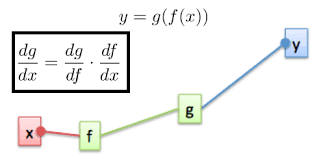

In [3]:
def backpropagation(X, y, learning_rate, num_iterations):
    # Randomly initialize weights
    np.random.seed(0)
    weights = 2 * np.random.random((3, 1)) - 1

    for i in range(num_iterations):
        # Forward propagation
        layer0 = X
        layer1 = sigmoid(np.dot(layer0, weights))

        # Calculate the error
        error = y - layer1

        # Backpropagation
        delta = error * sigmoid_derivative(layer1)
        weights += learning_rate * np.dot(layer0.T, delta)

    return weights

The `backpropagation` function takes the input features (`X`), output labels (`y`), learning rate, and the number of iterations as inputs. It implements the backpropagation algorithm to train a simple neural network with a single hidden layer.

1. Random Initialization: The function starts by randomly initializing the weights of the network. The weights are generated using the NumPy library, creating a 3x1 matrix with values ranging from -1 to 1.

2. Iterative Training: The function then enters a loop that iterates for the specified number of iterations. During each iteration, the forward propagation and backpropagation steps are performed to update the weights.

3. Forward Propagation: In the forward propagation step, the input features (`X`) are passed through the network to compute the predicted output (`layer1`). This is done by taking the dot product of the input features and the weights, and then applying the sigmoid activation function to the result.

4. Error Calculation: The error is calculated by subtracting the predicted output (`layer1`) from the true output (`y`).

5. Backpropagation: In the backpropagation step, the error is multiplied by the derivative of the sigmoid function applied to the predicted output (`delta`). This derivative represents the contribution of the weights to the error. The weights are then updated by multiplying the learning rate with the dot product of the input features (`layer0`) transposed and the error (`delta`).

6. Iteration Completion: The loop continues for the specified number of iterations, adjusting the weights based on the error gradient until the training process is complete.

7. Return Weights: Finally, the function returns the updated weights.

Note that this implementation assumes a single hidden layer neural network with a sigmoid activation function. The function uses the `sigmoid` function and `sigmoid_derivative` function, which are assumed to be defined elsewhere.

In [4]:
# Example usage
X = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])  # Input features
y = np.array([[0, 1, 1, 0]]).T  # Output labels

In [5]:
# Perform backpropagation
weights = backpropagation(X, y, learning_rate=1, num_iterations=10000)

In [6]:
# Test the trained model
test_input = np.array([[1, 0, 0]])  # New input to predict
predicted_output = sigmoid(np.dot(test_input, weights))

In [7]:
print("Predicted output:", predicted_output)

Predicted output: [[0.99993703]]


### Let's see the implementation in a glance 

In [8]:
import numpy as np

def sigmoid(x):

    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):

    return x * (1 - x)

def backpropagation(X, y, learning_rate, num_iterations):
    
    np.random.seed(0)
    weights = 2 * np.random.random((3, 1)) - 1

    for i in range(num_iterations):

        layer0 = X
        layer1 = sigmoid(np.dot(layer0, weights))

        error = y - layer1

        delta = error * sigmoid_derivative(layer1)
        weights += learning_rate * np.dot(layer0.T, delta)

    return weights


X = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
y = np.array([[0, 1, 1, 0]]).T


weights = backpropagation(X, y, learning_rate=1, num_iterations=10000)


test_input = np.array([[1, 0, 0]])  
predicted_output = sigmoid(np.dot(test_input, weights))

print("Predicted output:", predicted_output)


Predicted output: [[0.99993703]]


### Applications

Backpropagation is a fundamental algorithm in neural networks that has various applications in the field of machine learning and artificial intelligence. Some of the key applications of backpropagation include:

1. Neural Network Training: Backpropagation is primarily used for training neural networks. It enables the network to learn from labeled examples by iteratively adjusting the weights based on the error between the predicted output and the true output. This training process allows neural networks to approximate complex patterns and relationships in the data.

2. Pattern Recognition: Backpropagation is widely used in pattern recognition tasks, such as image classification, speech recognition, and natural language processing. Neural networks trained with backpropagation can learn to recognize and classify patterns in various forms of data, enabling applications like image recognition, voice commands, and sentiment analysis.

3. Regression Analysis: Backpropagation can be applied to regression problems, where the goal is to predict a continuous target variable. By adjusting the weights of a neural network through backpropagation, it can learn to make accurate predictions based on the input features, making it useful for tasks such as stock market prediction, house price estimation, and demand forecasting.

4. Anomaly Detection: Backpropagation can be used for anomaly detection, where the goal is to identify unusual or abnormal instances in a dataset. By training a neural network with backpropagation on a set of normal instances, the network can learn to distinguish between normal and anomalous patterns, enabling applications like fraud detection, network intrusion detection, and system health monitoring.

5. Reinforcement Learning: Backpropagation is also employed in reinforcement learning, a subfield of machine learning that focuses on training agents to make decisions in an environment to maximize a reward. By combining backpropagation with reinforcement learning algorithms such as Q-learning or policy gradients, neural networks can learn to make optimal decisions in complex environments, leading to applications like game playing, robotics control, and autonomous navigation.

These are just a few examples of the wide range of applications of backpropagation. Its ability to train neural networks to learn complex patterns and make accurate predictions makes it a crucial algorithm in many areas of machine learning and artificial intelligence.

<div style="font-family: Arial; font-size: 16px; color: #333; background-color: #f8f8f8; padding: 10px; border: 1px solid #ccc;">
    <p>🙏 Thank you all for taking the time to read my backpropagation notebook! I am incredibly grateful for your support and engagement. It means a lot to me to see your positive response and thoughtful comments. Your feedback and encouragement motivate me to keep sharing valuable content. If there's anything specific you'd like me to cover in the future, please let me know. Once again, thank you for being a part of this journey! 🌟

Regards
Jatin</p>
</div>
